In [1]:
###Importing the libraries and function###
import cv2
import matplotlib.pyplot as plt
import numpy as np
from Cross_Correlation import cross_correlation
from Correlation_Coefficient import mean
from Correlation_Coefficient import correlation_coefficient
from Fourier_Transform import FT
from Zoom import zoom

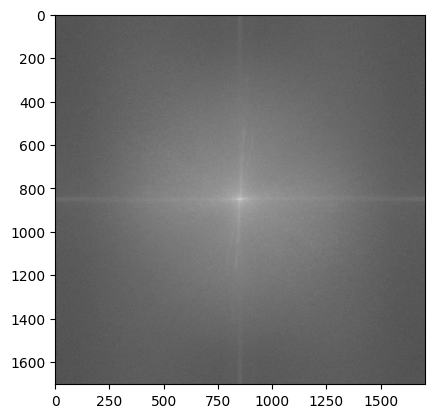

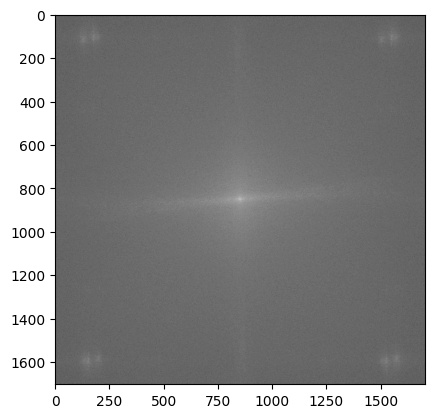

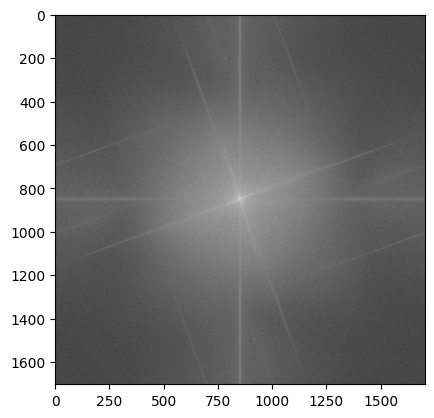

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_17992\2747005685.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../../results/Fourier_Mellin//magnitude_spectrum.jpg',cmap='gray')
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_17992\2747005685.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../../results/Fourier_Mellin/magnitude_spectrum2.jpg',cmap='gray')
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_17992\2747005685.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../../results/Fourier_Mellin/magnitude_spectrum3.jpg',cmap='gray')


1.0 0.7907363995865226 0.8454572378361477


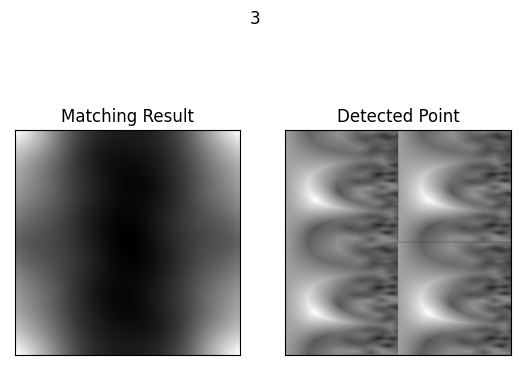

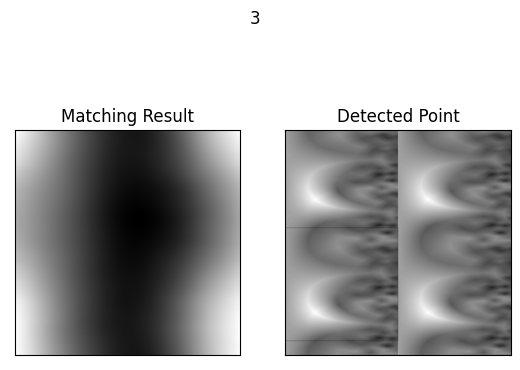

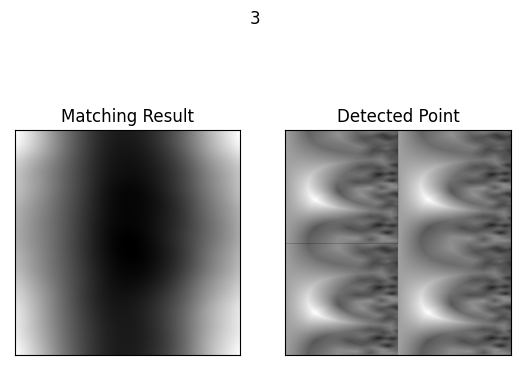

In [2]:

###Importing the picture###
img = cv2.imread('../../images/Fourier_Mellin/main.jpg',0)
img2 =cv2.imread('../../images/Fourier_Mellin/The_Kiss.jpg',0)

#Creating the rotated and scaled picture
w, h = img.shape[::-1]
center = ((w/2,h/2))
Mlimit = cv2.getRotationMatrix2D((w/2,h/2),20, 1)
img3 = cv2.warpAffine(img, Mlimit, (w, h))
img3=zoom(img3,1.25)
#cv2.imwrite("./final.jpg",img3)

###Calculating the Fourier and Log-polar Transform###

magnitude_spectrum = FT(img,851,'../../results/Fourier_Mellin/FT_main')
magnitude_spectrum2 = FT(img2,851,'../../results/Fourier_Mellin/FT_The_Kiss')
magnitude_spectrum3 = FT(img3,851,'../../results/Fourier_Mellin/FT_main_2')
#Saving the result

plt.imshow(magnitude_spectrum,cmap='gray')
plt.savefig('../../results/Fourier_Mellin//magnitude_spectrum.jpg',cmap='gray')
plt.imshow(magnitude_spectrum2,cmap='gray')
plt.savefig('../../results/Fourier_Mellin/magnitude_spectrum2.jpg',cmap='gray')
plt.imshow(magnitude_spectrum3,cmap='gray')
plt.savefig('../../results/Fourier_Mellin/magnitude_spectrum3.jpg',cmap='gray')

###Calculating the Correlation Coefficient###
Cm1=correlation_coefficient(magnitude_spectrum,magnitude_spectrum)
Cm2=correlation_coefficient(magnitude_spectrum,magnitude_spectrum2)
Cm3=correlation_coefficient(magnitude_spectrum,magnitude_spectrum3)

print(Cm1,Cm2,Cm3)#Printing the coefficient

###Calculating and ploting the result of the cross-correlation
cross_correlation(magnitude_spectrum,'cv2.TM_CCORR_NORMED',magnitude_spectrum, '../../results/Fourier_Mellin/CC_main')
cross_correlation(magnitude_spectrum,'cv2.TM_CCORR_NORMED',magnitude_spectrum2,'../../results/Fourier_Mellin/The_Kiss')
cross_correlation(magnitude_spectrum,'cv2.TM_CCORR_NORMED',magnitude_spectrum3,'../../results/Fourier_Mellin/CC_main_2')


Fourier transform for picture matching seems to be suboptimal by killing the phases twice, we can see that the algorithms for picture matching struggle to correctly match pictures together and overmatch pictures. 


If we were to compare the cross-correlation and the correlation coefficient, the later seems to let us recognize the foreign pictures easily, we just need to find a threshold, if we are under the threshold we can guess it's a foreign picture and if we are above we can assume it's a match. 
The cross-correlation seems to have blurry result with a lot of noisy and it makes it hard to identify the movement on the X \& Y axis.
